EDA (Exploratory Data Analysis)

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("..\DATA\Global_Music_Streaming_Listener_Preferences.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

In [5]:
df.head(5)

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


In [6]:
df = df.drop('User_ID',axis=1)

In [7]:
df.columns

Index(['Age', 'Country', 'Streaming Platform', 'Top Genre',
       'Minutes Streamed Per Day', 'Number of Songs Liked',
       'Most Played Artist', 'Subscription Type',
       'Listening Time (Morning/Afternoon/Night)',
       'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)'],
      dtype='object')

In [8]:
new_col = {
    'Listening Time (Morning/Afternoon/Night)' : 'Listening Time'
    ,'Discover Weekly Engagement (%)' : "Discover Weekly Engagement", 
    'Repeat Song Rate (%)' : "Repeat Song Rate"
}

In [9]:
df.rename(columns=new_col,inplace=True)

In [10]:
numeric_col = df.select_dtypes(include=['number']).columns

In [11]:
numeric_col

Index(['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked',
       'Discover Weekly Engagement', 'Repeat Song Rate'],
      dtype='object')

In [12]:
non_numeric_col = df.select_dtypes(exclude=['number']).columns

In [13]:
non_numeric_col

Index(['Country', 'Streaming Platform', 'Top Genre', 'Most Played Artist',
       'Subscription Type', 'Listening Time'],
      dtype='object')

In [14]:
for col in non_numeric_col : 
    print(col)
    print(df[col].unique())
    print("\n")

Country
['Japan' 'Germany' 'Australia' 'South Korea' 'UK' 'Brazil' 'Canada'
 'India' 'USA' 'France']


Streaming Platform
['Tidal' 'Deezer' 'YouTube' 'Amazon Music' 'Spotify' 'Apple Music']


Top Genre
['Reggae' 'Country' 'Pop' 'EDM' 'Classical' 'Metal' 'Rock' 'Hip-Hop' 'R&B'
 'Jazz']


Most Played Artist
['Adele' 'Ed Sheeran' 'Post Malone' 'Dua Lipa' 'The Weeknd'
 'Billie Eilish' 'BTS' 'Taylor Swift' 'Drake' 'Bad Bunny']


Subscription Type
['Free' 'Premium']


Listening Time
['Afternoon' 'Night' 'Morning']




In [15]:
categorical_col = ["Top Genre","Subscription Type","Listening Time"]

In [16]:
for col in categorical_col : 
    df[col + " (encoded)"] = pd.Categorical(df[col]).codes

In [17]:
df.head(5)

,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time,Discover Weekly Engagement,Repeat Song Rate,Top Genre (encoded),Subscription Type (encoded),Listening Time (encoded)
0,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74,8,0,0
1,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25,1,1,2
2,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38,6,1,0
3,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51,8,1,1
4,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41,8,0,2


In [18]:
for col in categorical_col : 
    print(col)
    print(dict(enumerate(pd.Categorical(df[col]).categories)))
    print("\n")

Top Genre
{0: 'Classical', 1: 'Country', 2: 'EDM', 3: 'Hip-Hop', 4: 'Jazz', 5: 'Metal', 6: 'Pop', 7: 'R&B', 8: 'Reggae', 9: 'Rock'}


Subscription Type
{0: 'Free', 1: 'Premium'}


Listening Time
{0: 'Afternoon', 1: 'Morning', 2: 'Night'}




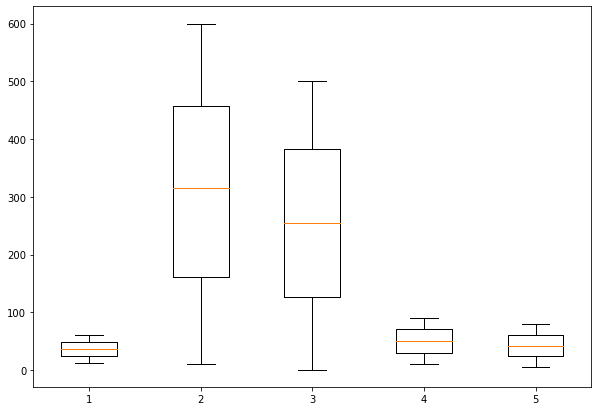

In [19]:
fig = plt.figure(figsize=(10, 7))
box_plt =  plt.boxplot(df[numeric_col])

#### Data Visualization

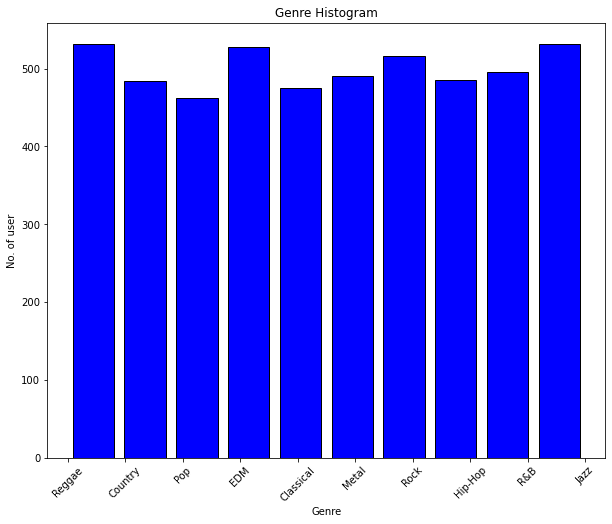

In [37]:
plt.figure(figsize=(10,8))
plt.hist(df["Top Genre"],color='blue',edgecolor='black',rwidth=0.8)
plt.title("Genre Histogram")
plt.xlabel("Genre")
plt.ylabel("No. of user")
plt.xticks(rotation=45)
plt.show()

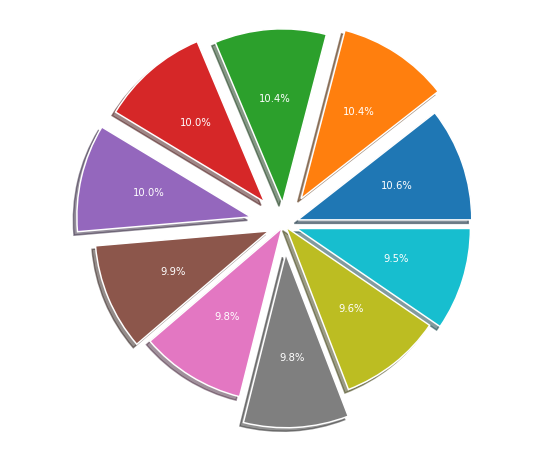

In [66]:
artist =  df['Most Played Artist'].value_counts().to_dict()
plt.figure(figsize=(10,8))
artist_name = list(artist.keys())
artist_feq = list(artist.values())
explode = np.random.uniform(low=0, high=0.2, size=len(artist))
plt.pie(artist_feq,labels=artist_name,autopct="%0.01f%%",shadow=True,explode=explode,textprops={"fontsize":10,"color":"white"},wedgeprops={"linewidth":1.5,"edgecolor":"white"})
plt.show()